In [91]:
import numpy as np
import pandas as pd

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨지는 문제 해결
plt.rcParams["font.family"] = 'AppleGothic' # Mac
# plt.rcParams["font.family"] = 'Malgun Gothic' # Windows

In [3]:
# HN16_ALL : 가구조사, 건강면접조사, 건강형태조사, 검진조사, 영양조사
# HN16_24RC : 식품섭취조사
# HN16_FFQ : 식품섭취빈도조사

df_ALL = pd.read_sas("./HN16_ALL.sas7bdat") 
#df_24RC = pd.read_sas("./HN16_24RC.sas7bdat")
df_ffq = pd.read_sas("./hn16_ffq.sas7bdat")
# df_24RC_code = pd.read_excel("./HN16_24RC(식품_음식코드).xlsx")

- 식품섭취조사(NH24RC)를 기반으로 섭취빈도와 양을 식품섭취빈도조사(HN16_FFQ)로 통계낸 것으로 파악됨
- ID값으로 가구조사 데이터와 식품섭취빈도조사 데이터 merge(left join)

In [4]:
df = pd.merge(df_ALL, df_ffq, on= 'ID', how='left')

- 1201개의 컬럼으로 join되었음
- 필요한 칼럼만 남기기 전 전체 데이터로 탐색 시작

In [5]:
df.shape

(8150, 1201)

In [6]:
# print(df.columns) 구분으로는 축약되어 나와서 전체 확인 불가
# for문 사용해서 전체 column명 출력
for i in df.columns:
    print(i)

mod_d_x
ID
ID_fam_x
year_x
region_x
town_t_x
apt_t_x
psu_x
sex_x
age_x
age_month_x
incm_x
ho_incm_x
edu_x
occp_x
wt_hs_x
wt_itvex_x
wt_pft_x
wt_hm_x
wt_ntr_x
wt_tot_x
wt_pfhm_x
wt_pfnt_x
wt_hmnt_x
wt_pfhmnt_x
kstrata_x
cfam
genertn
allownc
house
live_t
ainc_unit1
ainc_1
ainc
marri_1
marri_2
fam_rela
tins
npins
id_f
id_m
D_1_1
D_2_1
D_2_wk
DI1_dg
DI1_ag
DI1_pr
DI1_pt
DI1_2
DI2_dg
DI2_ag
DI2_pr
DI2_pt
DI2_2
DI3_dg
DI3_ag
DI3_pr
DI3_pt
DI3_2
DI4_dg
DI4_pr
DI4_pt
DI5_dg
DI5_ag
DI5_pr
DI5_pt
DI6_dg
DI6_ag
DI6_pr
DI6_pt
DM1_dg
DM1_pr
DM1_pt
DM2_dg
DM2_ag
DM2_pr
DM2_pt
DM3_dg
DM3_ag
DM3_pr
DM3_pt
DM4_dg
DM4_ag
DM4_pr
DM4_pt
DJ2_dg
DJ2_ag
DJ2_pr
DJ2_pt
DJ4_dg
DJ4_ag
DJ4_pr
DJ4_pt
DJ4_3
DE1_dg
DE1_ag
DE1_pr
DE1_pt
DE1_3
DE1_31
DE1_32
DE1_33
DE1_34
DE1_35
DE1_4
DE2_dg
DE2_ag
DE2_pr
DE2_pt
DC1_dg
DC1_ag
DC1_pr
DC1_pt
DC2_dg
DC2_ag
DC2_pr
DC2_pt
DC3_dg
DC3_ag
DC3_pr
DC3_pt
DC4_dg
DC4_ag
DC4_pr
DC4_pt
DC5_dg
DC5_ag
DC5_pr
DC5_pt
DC6_dg
DC6_ag
DC6_pr
DC6_pt
DC7_dg
DC7_ag
DC7_pr
DC7_pt
DC11_tp
DC11_d

In [95]:
#  1 : 남자, 2 : 여자
print("total : ", df.sex_x.count()) # 성별정보 전체 카운트, 8150으로 전체 row와 일치
print(pd.value_counts(df.sex_x.values)) # 각 성별 카운트

total :  8150
2.0    4485
1.0    3665
dtype: int64


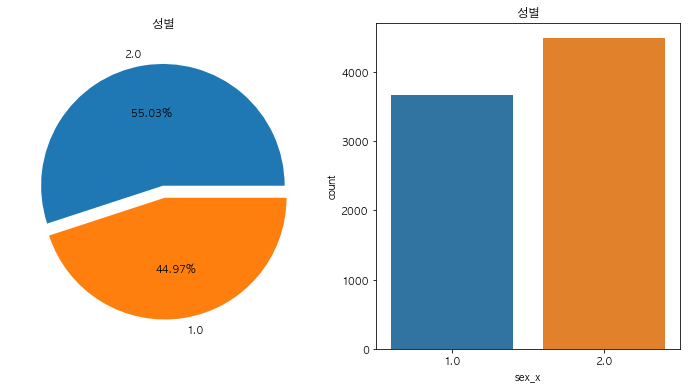

In [100]:
# 성별 그래프
f,ax=plt.subplots(1,2,figsize=(12,6))

# 비율
df['sex_x'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('성별')
ax[0].set_ylabel('')

# 숫자
sns.countplot('sex_x', data=df, ax=ax[1])
ax[1].set_title('성별')
plt.show()

- 대상연령별 조사 항목이 매우 상이하므로 나이대를 감안하여 주제선정, 및 데이터 확인 필요
![표3-1. 제7기 1차년도(2016) 건강설문조사 항목](https://user-images.githubusercontent.com/23414560/47694949-2cf56780-dc43-11e8-8e4b-5a4e0862708d.png "표3-1. 제7기 1차년도(2016) 건강설문조사 항목")

In [97]:
#  나이
print("total : ", df.age_x.count()) # 나이정보 전체 카운트, 8150으로 전체 row와 일치
print(pd.value_counts(df.age_x.values, sort=False).sort_index()) # 각 나이 카운트
df.groupby([df.age_x]).count() # 각 나이별 데이터값 포함되어 있는 내용 카운트, 대략적으로 어느 항목들 조사하고 설문응답했는지 확인 가능

total :  8150
1.0     109
2.0      93
3.0     121
4.0     122
5.0     108
6.0     115
7.0     111
8.0     109
9.0     104
10.0     85
11.0     92
12.0     80
13.0     99
14.0     92
15.0     86
16.0     78
17.0     89
18.0     75
19.0     67
20.0     48
21.0     67
22.0     66
23.0     68
24.0     82
25.0     69
26.0     78
27.0     76
28.0     66
29.0     61
30.0     69
       ... 
51.0    112
52.0     96
53.0    122
54.0    110
55.0    131
56.0    112
57.0    127
58.0    128
59.0    115
60.0    106
61.0    118
62.0    102
63.0     94
64.0    102
65.0    121
66.0     85
67.0    105
68.0    119
69.0    103
70.0     90
71.0     94
72.0     91
73.0     92
74.0     87
75.0     87
76.0     65
77.0     83
78.0     61
79.0     68
80.0    281
Length: 80, dtype: int64


,mod_d_x,ID,ID_fam_x,year_x,region_x,town_t_x,apt_t_x,psu_x,sex_x,age_month_x,...,FQ_FE,FQ_NA,FQ_K,FQ_VA,FQ_RETIN,FQ_CAROT,FQ_B1,FQ_B2,FQ_NIAC,FQ_VITC
age_x,,,,,,,,,,,,,,,,,,,,,
1.0,109,109,109,109,109,109,109,109,109,109,...,0,0,0,0,0,0,0,0,0,0
2.0,93,93,93,93,93,93,93,93,93,93,...,0,0,0,0,0,0,0,0,0,0
3.0,121,121,121,121,121,121,121,121,121,121,...,0,0,0,0,0,0,0,0,0,0
4.0,122,122,122,122,122,122,122,122,122,122,...,0,0,0,0,0,0,0,0,0,0
5.0,108,108,108,108,108,108,108,108,108,108,...,0,0,0,0,0,0,0,0,0,0
6.0,115,115,115,115,115,115,115,115,115,115,...,0,0,0,0,0,0,0,0,0,0
7.0,111,111,111,111,111,111,111,111,111,0,...,0,0,0,0,0,0,0,0,0,0
8.0,109,109,109,109,109,109,109,109,109,0,...,0,0,0,0,0,0,0,0,0,0
9.0,104,104,104,104,104,104,104,104,104,0,...,0,0,0,0,0,0,0,0,0,0


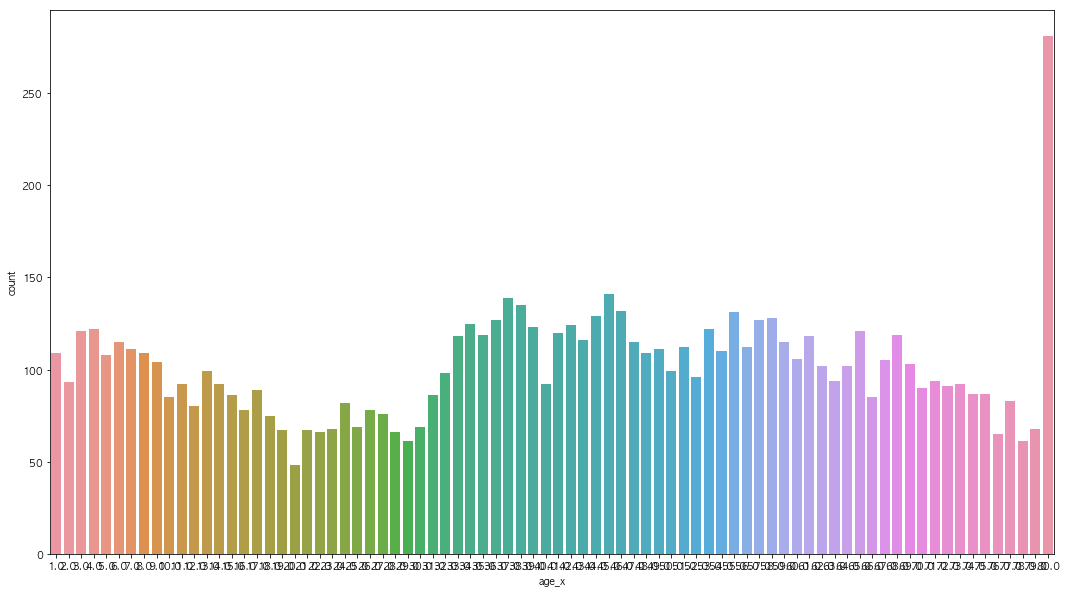

In [101]:
# 나이별 countplot
f,ax=plt.subplots(1,1,figsize=(18,10))
sns.countplot('age_x', data=df)
plt.show()